In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Admin',
    database='ecommerce'
)

cursor = db.cursor()

# List all unique cities where customers are located.

In [5]:
query = """ select distinct customer_city from customers"""
cursor.execute(query)

data = cursor.fetchall()

data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# Count the number of orders placed in 2017.

In [7]:
query = """ SELECT COUNT(order_id) FROM `orders` WHERE YEAR(order_purchase_timestamp) = 2017"""
cursor.execute(query)

data = cursor.fetchall()

data[0][0]

45101

# Find the total sales per category.

In [17]:
query = """
SELECT 
    products.product_category AS category, 
    round(SUM(payments.payment_value),2) AS sales
FROM products
JOIN order_items 
    ON products.product_id = order_items.product_id
JOIN payments 
    ON payments.order_id = order_items.order_id
GROUP BY category
        """
cursor.execute(query)

data = cursor.fetchall()

df = pd.DataFrame(data,columns=["Category","Sales"])
df

,Category,Sales
0,perfumery,506738.66
1,Furniture Decoration,1430176.39
2,telephony,486882.05
3,bed table bath,1712553.67
4,automotive,852294.33
...,...,...
69,cds music dvds,1199.43
70,La Cuisine,2913.53
71,Fashion Children's Clothing,785.67
72,PC Gamer,2174.43


# Calculate the percentage of orders that were paid in installments.

In [22]:
query = """
SELECT 
    (SUM(CASE WHEN payment_installments >= 1 THEN 1 ELSE 0 END) * 100.0) / COUNT(*) AS percentage
FROM payments;
        """
cursor.execute(query)

data = cursor.fetchall()

data[0][0]

Decimal('99.99807')

# Count the number of customers from each state. 

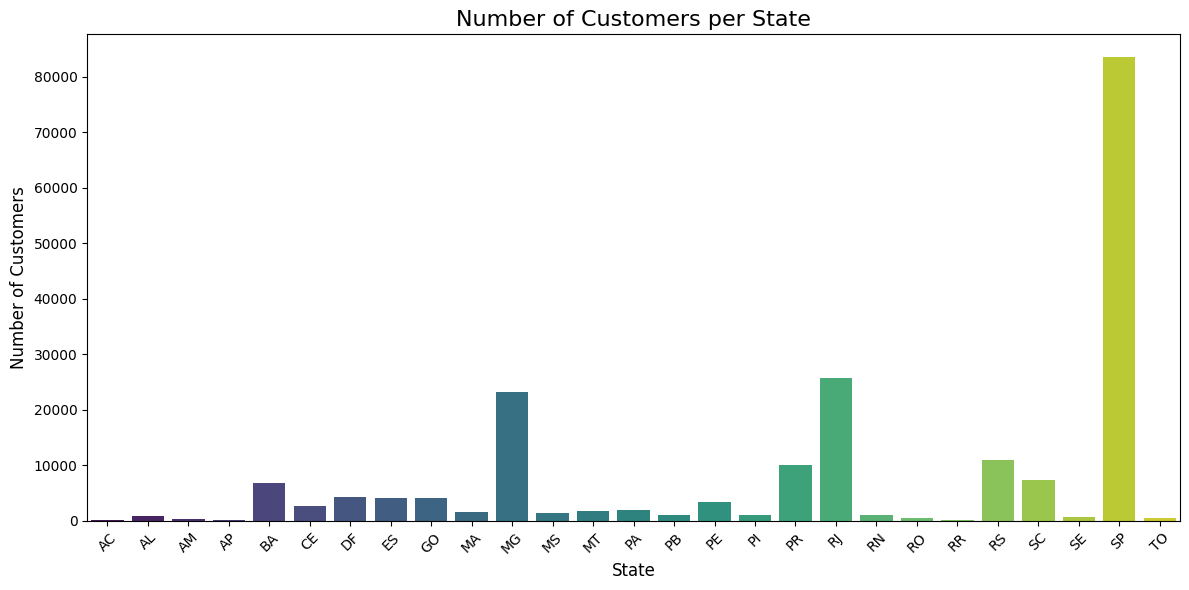

In [29]:
query = """
SELECT customer_state, COUNT(customer_id) 
FROM customers 
GROUP BY customer_state;
"""
cursor.execute(query)

# --- Fetch Data ---
data = cursor.fetchall()

# --- Create DataFrame ---
df = pd.DataFrame(data, columns=["States", "No of Customer"])

# --- Optional: Sort by number of customers (descending order) ---
df = df.sort_values(by="States", ascending=True)

# --- Plot Bar Chart using Seaborn ---
plt.figure(figsize=(12,6))  # Set figure size
sns.barplot(x="States", y="No of Customer", hue="States", data=df, palette="viridis", legend=False)


# --- Customize Chart ---
plt.title("Number of Customers per State", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# --- Show Chart ---
plt.show()